# PRACTICA 08

In [6]:
%%time
# INTALACION DE LIBRERIAS

from gc import collect; # recolección de basura para liberar memoria
from warnings import filterwarnings; # manejo de mensajes de advertencia
import re # expresiones regulares
import numpy as np # álgebra lineal
import pandas as pd # procesamiento de datos, E/S de archivos CSV (ej. pd.read_csv)
from scipy import stats # funciones estadísticas
from itertools import cycle, combinations  # generando combinaciones y ciclos
import matplotlib.pyplot as plt # visualización de datos
from matplotlib.ticker import FuncFormatter  # Para formato personalizado de marcas
from matplotlib.ticker import FormatStrFormatter  # Para formatear marcas con una cadena
from mpl_toolkits.mplot3d import Axes3D  # Importando módulo de ejes 3D
from matplotlib.colors import ListedColormap  # Importando mapa de colores para gráfico de dispersión
import seaborn as sns # visualización estadística de datos
from wordcloud import WordCloud  # Importando librería WordCloud para visualización de datos textuales
from io import StringIO
filterwarnings('ignore'); # Ignorar mensajes de advertencia
from IPython.display import display, HTML, display_html, clear_output; # mostrando contenido HTML

clear_output();
print();
collect();


CPU times: total: 109 ms
Wall time: 113 ms


In [7]:
# Define la clase de color para colorear el texto de la terminal
class color:
    GREEN = '\033[92m'
    RED = '\033[91m'
    YELLOW = '\033[93m'
    END = '\033[0m'
    

# Then use your existing code
plt.style.use("fivethirtyeight")
sns.set(rc={"figure.figsize":(10, 10)})
print(f"{color.GREEN}Successfully Configured libraries!{color.END}")

Successfully Configured libraries!


## STEP 2: LOAD DATASET

In [8]:
%%time


try:
    df = pd.read_csv('salaries.csv')
    print(f"{color.GREEN}Dataset loaded successfully.{color.END}")
    
except FileNotFoundError:
    print(f"{color.RED}Error: File not found. Please check the file path.{color.END}")

except Exception as e:
    print(f"{color.RED}An error occurred while loading the dataset: {e}{color.END}")

print(color.YELLOW)
collect();

Dataset loaded successfully.

CPU times: total: 234 ms
Wall time: 275 ms


## STEP 3: DESCRIPCION GENERAL DE ATRIBUTOS

In [11]:
### Defina primero la función que falta
def display_dataframe_with_custom_header(df, show_head=False):
    """
    Mostrar información sobre un marco de datos o su encabezado
    
    Parameters:
    df (pandas.DataFrame): The dataframe to display
    show_head (bool): If True, display the first few rows of the dataframe
                     If False, display dataframe info
    """
    if show_head:
        display(df.head())  
    else:
        display(df.info()) 

# Ahora usa la función
display_dataframe_with_custom_header(df)  
display_dataframe_with_custom_header(df, show_head=True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73148 entries, 0 to 73147
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           73148 non-null  int64 
 1   experience_level    73148 non-null  object
 2   employment_type     73148 non-null  object
 3   job_title           73148 non-null  object
 4   salary              73148 non-null  int64 
 5   salary_currency     73148 non-null  object
 6   salary_in_usd       73148 non-null  int64 
 7   employee_residence  73148 non-null  object
 8   remote_ratio        73148 non-null  int64 
 9   company_location    73148 non-null  object
 10  company_size        73148 non-null  object
dtypes: int64(4), object(7)
memory usage: 6.1+ MB


None

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,SE,FT,Data Product Owner,170000,USD,170000,US,0,US,M
1,2025,SE,FT,Data Product Owner,110000,USD,110000,US,0,US,M
2,2025,SE,FT,Data Product Owner,170000,USD,170000,US,0,US,M
3,2025,SE,FT,Data Product Owner,110000,USD,110000,US,0,US,M
4,2025,SE,FT,Engineer,143000,USD,143000,US,0,US,M


## STEP 4: MANEJO DE VALORES FALTANTES

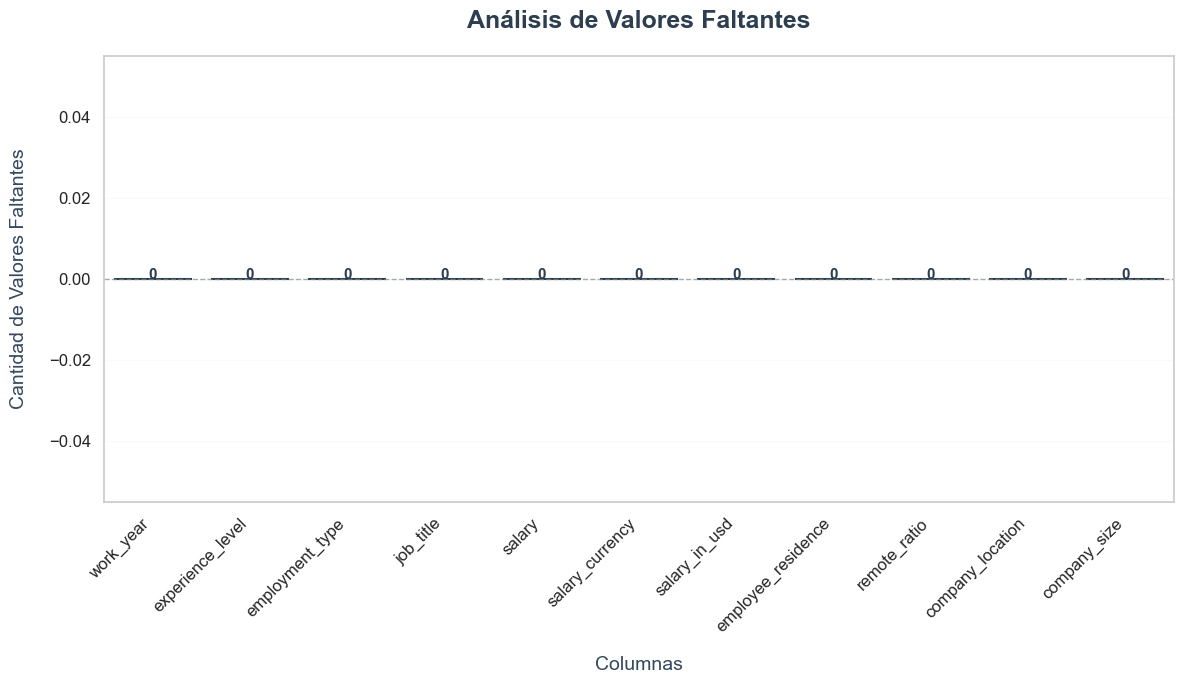

In [21]:
# Calcular la cantidad de valores faltantes por columna
missing_values = df.isnull().sum()

# Crear un DataFrame para graficar
missing_df = pd.DataFrame({
    'Columnas': missing_values.index,
    'Valores Faltantes': missing_values.values
})

# Configuración de estilo mejorado
plt.figure(figsize=(12, 7))
sns.set_style("whitegrid", {'grid.color': '#f0f0f0'})

# Paleta de colores profesional (azules)
custom_palette = sns.color_palette("Blues_d", n_colors=len(missing_df))

# Crear el gráfico de barras
barplot = sns.barplot(
    x="Columnas", 
    y="Valores Faltantes", 
    data=missing_df,
    palette=custom_palette,
    edgecolor='#2c3e50',  # Borde oscuro
    linewidth=1.5,
    saturation=0.85
)

# Personalización avanzada de barras
for bar in barplot.patches:
    bar.set_hatch('')  # Eliminamos el sombreado para mejor legibilidad
    
# Mostrar número de valores faltantes sobre cada barra
for index, row in missing_df.iterrows():
    barplot.text(index, 
                row["Valores Faltantes"] + max(missing_values)*0.01,  # Pequeño margen
                int(row["Valores Faltantes"]), 
                color='#2c3e50',  # Texto en color oscuro
                ha="center",
                fontsize=11,
                fontweight='bold')

# Títulos y etiquetas mejoradas
plt.title("Análisis de Valores Faltantes", 
          fontsize=18, 
          pad=20,
          color='#2c3e50',
          fontweight='bold')

plt.xlabel("Columnas", fontsize=14, color='#34495e', labelpad=15)
plt.ylabel("Cantidad de Valores Faltantes", fontsize=14, color='#34495e', labelpad=15)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Línea de referencia y fondo
plt.axhline(0, color='#7f8c8d', linestyle='--', linewidth=1, alpha=0.7)
plt.grid(axis='y', alpha=0.3)

# Ajustar márgenes
plt.tight_layout()

# Mostrar el gráfico
plt.show()

## STEP 5: ELIMINAR VALORES DUPLICADOS

In [14]:
# Definir códigos de color ANSI
BLUE = '\033[94m'
RED = '\033[91m'
BOLD = '\033[1m'
END = '\033[0m'

duplicate_values = df.duplicated().sum()
print(f"{BLUE}The data contains {BOLD}{RED}{duplicate_values}{END}{BLUE} duplicate values{END}")

The data contains 39124 duplicate values


In [15]:
# Crear diccionario: True si la columna NO tiene duplicados, False si sí tiene
sin_duplicados = {
    columna: df[columna].duplicated().sum() == 0
    for columna in df.columns
}

# Convertir a DataFrame
df_sin_duplicados = pd.DataFrame.from_dict(sin_duplicados, orient='index', columns=['No Duplicates'])

# Mostrar como tabla estilizada con colores (verde si True, rojo si False)
df_sin_duplicados.style.applymap(lambda x: 'color: green' if x else 'color: red')

,No Duplicates
work_year,False
experience_level,False
employment_type,False
job_title,False
salary,False
salary_currency,False
salary_in_usd,False
employee_residence,False
remote_ratio,False
company_location,False


## STEP 6: RESUMEN DE DATOS ESTADISTICOS

In [17]:
def calculate_statistics(df, opacity=0.4, font_size='14px'):
    # Seleccionar sólo columnas numéricas
    numeric_df = df.select_dtypes(include=['number'])
    
    # # Calcular estadísticas solo para columnas numéricas
    stats = pd.DataFrame({
        'Mean': numeric_df.mean(),
        'Median': numeric_df.median(),
        'Mode': numeric_df.mode().iloc[0],
        'Range': numeric_df.max() - numeric_df.min(),
        'Stdev': numeric_df.std(),
        'Variance': numeric_df.var(),
        'IQR': numeric_df.quantile(0.75) - numeric_df.quantile(0.25),
        '25%': numeric_df.quantile(0.25),
        '50%': numeric_df.quantile(0.5),
        '75%': numeric_df.quantile(0.75),
        'Min': numeric_df.min(),
        'Max': numeric_df.max(),
        'Skewness': numeric_df.skew(),
        'Kurtosis': numeric_df.kurtosis()
    }).T

    # Se le da estilos
    styled_stats = stats.style.set_properties(**{
        'background-color': f'rgba(173, 216, 230, {opacity})',
        'font-size': font_size,
        'text-align': 'center'
    }).set_table_styles([
        {'selector': 'th', 'props': [('font-weight', 'bold'), ('background-color', 'white'), ('color', 'black'), ('text-align', 'center')]},
        {'selector': 'td', 'props': [('border', '1px solid #bbb')]},
        {'selector': 'caption', 'props': [('caption-side', 'bottom'), ('font-size', '16px'), ('color', '#555')]}
    ]).set_caption("Estadísticas Descriptivas por Columna")

    return styled_stats

In [19]:
# MANDAMOS A LAMAR LA FUNCION PARA LAS TABLAS
stats_df = calculate_statistics(df, opacity=0.4, font_size='19px')
stats_df

,work_year,salary,salary_in_usd,remote_ratio
Mean,2023.831192,162553.435378,158013.748619,21.582955
Median,2024.000000,148000.000000,147500.000000,0.000000
Mode,2024.000000,160000.000000,160000.000000,0.000000
Range,5.000000,30386000.000000,785000.000000,100.000000
Stdev,0.477551,192576.111990,72501.304728,41.023051
Variance,0.228055,37085558909.139099,5256439187.315152,1682.890749
IQR,0.000000,93042.500000,92810.000000,0.000000
25%,2024.000000,106957.500000,106890.000000,0.000000
50%,2024.000000,148000.000000,147500.000000,0.000000
75%,2024.000000,200000.000000,199700.000000,0.000000


In [20]:
# VARIABLES
def variable_summary(df):
    # Crear el resumen de variables
    summary = pd.DataFrame({
        'Variable': df.columns,
        'Dtype': df.dtypes.values,
        'Count': [len(df)] * len(df.columns), 
        'Unique': df.nunique().values,
        'Missing': df.isnull().sum().values
    })
    
    # Aplicar el estilo similar a la imagen
    styled = summary.style \
        .set_properties(**{
            'text-align': 'left',
            'font-size': '12px',
            'border': '1px solid #e0e0e0',
            'padding': '4px 8px'
        }) \
        .set_table_styles([
            {'selector': 'th', 
             'props': [
                 ('background-color', '#f8f9fa'),
                 ('color', '#202124'),
                 ('font-weight', 'bold'),
                 ('border', '1px solid #e0e0e0'),
                 ('padding', '8px 16px')
             ]},
            {'selector': 'td', 
             'props': [
                 ('border', '1px solid #e0e0e0'),
                 ('padding', '8px 16px')
             ]},
            {'selector': 'tr:hover', 
             'props': [
                 ('background-color', '#f1f3f4')
             ]}
        ]) \
        .hide(axis='index')  # Ocultar el índice
    
    return styled

# Llamar a la función con tu DataFrame
summary_df = variable_summary(df)
summary_df

Variable,Dtype,Count,Unique,Missing
work_year,int64,73148,6,0
experience_level,object,73148,4,0
employment_type,object,73148,4,0
job_title,object,73148,289,0
salary,int64,73148,7094,0
salary_currency,object,73148,25,0
salary_in_usd,int64,73148,7702,0
employee_residence,object,73148,93,0
remote_ratio,int64,73148,3,0
company_location,object,73148,86,0
